In [1]:
import numpy as np

# 支配モデル

総収益を最大化するような利用料金を設定する

## 仮定

- 利用料金が高いと，利用者数も減少する

## 
- グループ全体を分割して，個別に料金設定を行うほうが全体としての収益が上がるはず

### モデルの基本構造
収益を最大化するために、収益 $R$ を以下のように定義します：
$$
R = P \cdot N(P)
$$
ここで、
- $P$ は利用料金（説明変数）
- $N(P)$ は利用者数（目的変数）、利用料金の関数として広義単調減少する

### 制約条件
- 利用料金 $P$ の下限と上限： $P_{\min} \leq P \leq P_{\max}$
- 利用者数 $N$ の下限と上限： $N_{\min} \leq N(P) \leq N_{\max}$

### 利用者数のモデル
利用者数 $N(P)$ は利用料金 $P$ に対して広義単調減少する関数としてモデル化されます。一般的には、以下のような形式で表現されます：
$$
N(P) = a \cdot e^{-bP} + c
$$
ここで、$a, b, c$ はモデルのパラメータで、利用者数の減少率や最小利用者数を調整します。

### 収益の最適化
収益 $R$ を最大化するためには、以下のような最適化問題を解く必要があります：

$$
\max_{P} \ R = P \cdot N(P)
$$

### 制約を考慮した最適化
制約条件を含めると、最適化問題は以下のようになります：
$$
\max_{P_{\min} \leq P \leq P_{\max}} \ R = P \cdot N(P)
$$
$$
\text{subject to} \quad N_{\min} \leq N(P) \leq N_{\max}
$$

### 月次の料金改定
月次で料金を改定するためには、前月の利用者数や収益に基づいて料金を調整するフィードバックループが必要です。例えば、前月の収益や利用者数の傾向を元に料金を増減するアルゴリズムを設定します。

### 具体例
具体的にモデルを構築し、最適化問題を解いてみましょう。パラメータ $a, b, c$ を仮定します：

- $a = 1000$
- $b = 0.01$
- $c = 100$
- $P_{\min} = 5$
- $P_{\max} = 50$
- $N_{\min} = 100$
- $N_{\max} = 1000$

この仮定のもとで、利用者数 $N(P)$ は以下のようになります：
$$
N(P) = 1000 \cdot e^{-0.01P} + 100
$$

収益 $R$ は以下のようになります：
$$
R = P \cdot (1000 \cdot e^{-0.01P} + 100)
$$

この収益を最大化する $P$ を求めるためには、以下の関数を最大化します：
$$
\max_{5 \leq P \leq 50} \ P \cdot (1000 \cdot e^{-0.01P} + 100)
$$

最適化問題を解くためには、微分を用いて解析的に解くか、数値的な方法を用います。数値的には、例えばPythonのSciPyライブラリを使用することができます。

```python
import numpy as np
from scipy.optimize import minimize_scalar

# 利用者数のモデル
def N(P):
    return 1000 * np.exp(-0.01 * P) + 100

# 収益のモデル
def revenue(P):
    return P * N(P)

# 最適化の実行
result = minimize_scalar(lambda P: -revenue(P), bounds=(5, 50), method='bounded')

optimal_P = result.x
optimal_revenue = revenue(optimal_P)

print(f'Optimal Price: {optimal_P}')
print(f'Optimal Revenue: {optimal_revenue}')
```

In [2]:
import numpy as np
from scipy.optimize import minimize_scalar

# 利用者数のモデル
def N(P):
    return 1000 * np.exp(-0.01 * P) + 100

# 収益のモデル
def revenue(P):
    return P * N(P)

# 最適化の実行
result = minimize_scalar(lambda P: -revenue(P), bounds=(5, 50), method='bounded')

optimal_P = result.x
optimal_revenue = revenue(optimal_P)

print(f'Optimal Price: {optimal_P}')
print(f'Optimal Revenue: {optimal_revenue}')

Optimal Price: 49.99999483631345
Optimal Revenue: 35326.53090329579


/Users/keisukeonoue/ws/Hackathon_vol.10/dp-env/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 21033 (\N{CJK UNIFIED IDEOGRAPH-5229}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/keisukeonoue/ws/Hackathon_vol.10/dp-env/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 29992 (\N{CJK UNIFIED IDEOGRAPH-7528}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/keisukeonoue/ws/Hackathon_vol.10/dp-env/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 32773 (\N{CJK UNIFIED IDEOGRAPH-8005}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/keisukeonoue/ws/Hackathon_vol.10/dp-env/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/keisukeonoue/ws/Hackathon

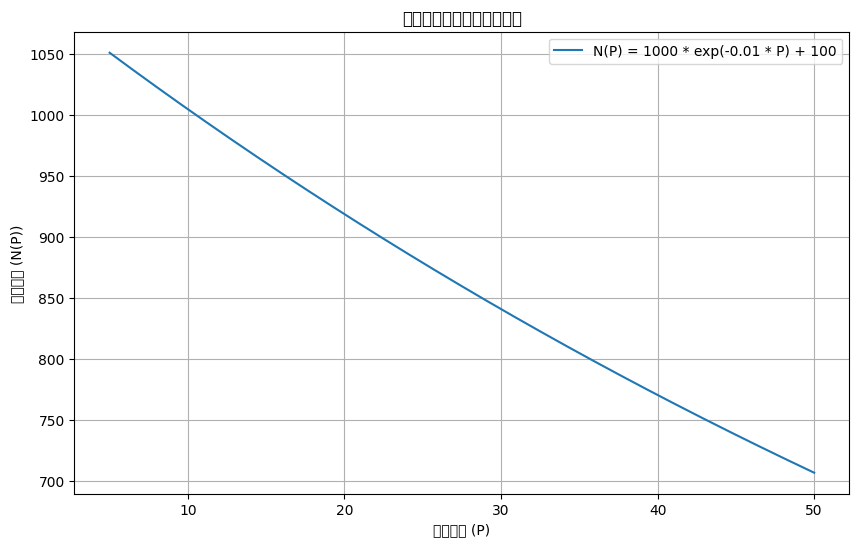

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# パラメータの設定
a = 1000
b = 0.01
c = 100

# 利用料金の範囲
P_values = np.linspace(5, 50, 500)

# 利用者数のモデル
def N(P):
    return a * np.exp(-b * P) + c

# 利用者数の計算
N_values = N(P_values)

# グラフの描画
plt.figure(figsize=(10, 6))
plt.plot(P_values, N_values, label='N(P) = 1000 * exp(-0.01 * P) + 100')
plt.xlabel('利用料金 (P)')
plt.ylabel('利用者数 (N(P))')
plt.title('利用料金と利用者数の関係')
plt.legend()
plt.grid(True)
plt.show()